In [ ]:
import pandas as pd


In [ ]:
datos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Challenge Alura: Telecom X II/datos_limpios.csv')

In [ ]:
datos.sample(5)

,id,cancelacion,genero,mayor_65,pareja,dependientes,meses_contrato,servicio_telefonico,multiples_lineas,proveedor_internet,...,soporte_tecnico,tv_cable,peliculas_streaming,tipo_contrato,factura_online,forma_pago,cargo_mensual,cargo_total,cuentas_diarias,num_servicios
5003,7047-FWEYA,False,female,False,True,False,46,True,True,fiber optic,...,True,True,True,one year,True,electronic check,103.15,4594.65,3.438333,6
5615,7927-AUXBZ,True,female,False,False,False,30,True,False,fiber optic,...,True,True,False,month-to-month,False,electronic check,85.15,2555.90,2.838333,3
337,0496-AHOOK,False,male,False,True,False,24,True,False,dsl,...,True,True,True,one year,False,bank transfer (automatic),74.40,1712.90,2.480000,5
176,0282-NVSJS,False,female,True,True,True,12,False,False,dsl,...,True,False,False,month-to-month,True,mailed check,29.30,355.90,0.976667,1
2142,3079-BCHLN,False,male,False,True,False,47,True,False,no,...,False,False,False,one year,False,bank transfer (automatic),19.90,942.95,0.663333,1


### **Eliminación de Columnas Irrelevantes**

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [ ]:
datos.columns

Index(['id', 'cancelacion', 'genero', 'mayor_65', 'pareja', 'dependientes',
       'meses_contrato', 'servicio_telefonico', 'multiples_lineas',
       'proveedor_internet', 'seguridad_online', 'respaldo_online',
       'proteccion_dispositivo', 'soporte_tecnico', 'tv_cable',
       'peliculas_streaming', 'tipo_contrato', 'factura_online', 'forma_pago',
       'cargo_mensual', 'cargo_total', 'cuentas_diarias', 'num_servicios'],
      dtype='object')

In [ ]:
df = datos.drop(columns=['id', 'cuentas_diarias', 'servicio_telefonico', 'genero', 'num_servicios'  ])
df.tail()

,cancelacion,mayor_65,pareja,dependientes,meses_contrato,multiples_lineas,proveedor_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_cable,peliculas_streaming,tipo_contrato,factura_online,forma_pago,cargo_mensual,cargo_total
7027,False,False,False,False,13,False,dsl,True,False,False,True,False,False,one year,False,mailed check,55.15,742.90
7028,True,False,True,False,22,True,fiber optic,False,False,False,False,False,True,month-to-month,True,electronic check,85.10,1873.70
7029,False,False,False,False,2,False,dsl,False,True,False,False,False,False,month-to-month,True,mailed check,50.30,92.75
7030,False,False,True,True,67,False,dsl,True,False,True,True,False,True,two year,False,mailed check,67.85,4627.65
7031,False,False,True,True,63,False,dsl,True,True,True,False,True,True,two year,False,electronic check,59.00,3707.60


### **Verificación de la Proporción de Cancelación (Churn)**

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

🔎 Sugerencia:
Puedes usar `value_counts()` de pandas para obtener esta proporción:

In [ ]:
# Verificar la proporción de cancelación en relación con los que permanecieron activos
cancelacion_proporcion = df['cancelacion'].value_counts(normalize=True) * 100

# Imprimir la proporción
print("Proporción de Cancelación:")
print(cancelacion_proporcion)

Proporción de Cancelación:
cancelacion
False    73.421502
True     26.578498
Name: proportion, dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cancelacion             7032 non-null   bool   
 1   mayor_65                7032 non-null   bool   
 2   pareja                  7032 non-null   bool   
 3   dependientes            7032 non-null   bool   
 4   meses_contrato          7032 non-null   int64  
 5   multiples_lineas        7032 non-null   bool   
 6   proveedor_internet      7032 non-null   object 
 7   seguridad_online        7032 non-null   bool   
 8   respaldo_online         7032 non-null   bool   
 9   proteccion_dispositivo  7032 non-null   bool   
 10  soporte_tecnico         7032 non-null   bool   
 11  tv_cable                7032 non-null   bool   
 12  peliculas_streaming     7032 non-null   bool   
 13  tipo_contrato           7032 non-null   object 
 14  factura_online          7032 non-null   

In [ ]:
# Transformar las columnas booleanas a valores binarios (0 y 1)
columnas_booleanas = ['cancelacion', 'mayor_65', 'pareja', 'dependientes',
                      'multiples_lineas', 'seguridad_online',
                      'respaldo_online', 'proteccion_dispositivo', 'soporte_tecnico',
                      'tv_cable', 'peliculas_streaming', 'factura_online']

In [ ]:
# Aplicar la conversión para cada columna booleana
for columna in columnas_booleanas:
    df[columna] = df[columna].astype(int)

df[columnas_booleanas].head()

,cancelacion,mayor_65,pareja,dependientes,multiples_lineas,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_cable,peliculas_streaming,factura_online
0,0,0,1,1,0,0,1,0,1,1,0,1
1,0,0,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,0,1
3,1,1,1,0,0,0,1,1,0,1,1,1
4,1,1,1,0,0,0,0,0,1,1,0,1


In [ ]:
cancelacion_proporcion = df['cancelacion'].value_counts(normalize=True) * 100

# Imprimir la proporción
print("Proporción de Cancelación:")
print(cancelacion_proporcion)

Proporción de Cancelación:
cancelacion
0    73.421502
1    26.578498
Name: proportion, dtype: float64


**Interpretación de los resultados:**

* Desbalance en las clases: Hay un desbalance entre las clases. La clase de clientes que **han cancelado (1) representa solo el 26.58% del total**, mientras que l**os que no han cancelado (0) representan un 73.42%.**

### **Encoding**

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

🔎 Sugerencia:
Puedes consultar este artículo para entender mejor cuándo usar get_dummies o OneHotEncoder:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cancelacion             7032 non-null   int64  
 1   mayor_65                7032 non-null   int64  
 2   pareja                  7032 non-null   int64  
 3   dependientes            7032 non-null   int64  
 4   meses_contrato          7032 non-null   int64  
 5   multiples_lineas        7032 non-null   int64  
 6   proveedor_internet      7032 non-null   object 
 7   seguridad_online        7032 non-null   int64  
 8   respaldo_online         7032 non-null   int64  
 9   proteccion_dispositivo  7032 non-null   int64  
 10  soporte_tecnico         7032 non-null   int64  
 11  tv_cable                7032 non-null   int64  
 12  peliculas_streaming     7032 non-null   int64  
 13  tipo_contrato           7032 non-null   object 
 14  factura_online          7032 non-null   

In [ ]:
# Columnas categóricas que necesitan codificación
columnas_categoricas = ['proveedor_internet', 'tipo_contrato', 'forma_pago']

# Aplicar One-Hot Encoding utilizando pd.get_dummies
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Verificar el DataFrame transformado
print(df_encoded.head())


   cancelacion  mayor_65  pareja  dependientes  meses_contrato  \
0            0         0       1             1               9   
1            0         0       0             0               9   
2            1         0       0             0               4   
3            1         1       1             0              13   
4            1         1       1             0               3   

   multiples_lineas  seguridad_online  respaldo_online  \
0                 0                 0                1   
1                 1                 0                0   
2                 0                 0                0   
3                 0                 0                1   
4                 0                 0                0   

   proteccion_dispositivo  soporte_tecnico  ...  factura_online  \
0                       0                1  ...               1   
1                       0                0  ...               0   
2                       1                0  ...      

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   cancelacion                         7032 non-null   int64  
 1   mayor_65                            7032 non-null   int64  
 2   pareja                              7032 non-null   int64  
 3   dependientes                        7032 non-null   int64  
 4   meses_contrato                      7032 non-null   int64  
 5   multiples_lineas                    7032 non-null   int64  
 6   seguridad_online                    7032 non-null   int64  
 7   respaldo_online                     7032 non-null   int64  
 8   proteccion_dispositivo              7032 non-null   int64  
 9   soporte_tecnico                     7032 non-null   int64  
 10  tv_cable                            7032 non-null   int64  
 11  peliculas_streaming                 7032 no

In [ ]:
# Convertir las columnas booleanas a enteros (0 y 1)
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.select_dtypes('bool').columns})

# Verificar los cambios
print(df_encoded.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   cancelacion                         7032 non-null   int64  
 1   mayor_65                            7032 non-null   int64  
 2   pareja                              7032 non-null   int64  
 3   dependientes                        7032 non-null   int64  
 4   meses_contrato                      7032 non-null   int64  
 5   multiples_lineas                    7032 non-null   int64  
 6   seguridad_online                    7032 non-null   int64  
 7   respaldo_online                     7032 non-null   int64  
 8   proteccion_dispositivo              7032 non-null   int64  
 9   soporte_tecnico                     7032 non-null   int64  
 10  tv_cable                            7032 non-null   int64  
 11  peliculas_streaming                 7032 no

### **Balanceo de Clases (opcional)**

Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

🔎 Sugerencia:
Puedes leer más sobre cómo manejar el desbalanceo de clases en este artículo:

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Dividir el dataset en características (X) y variable objetivo (y)
# X es el conjunto de datos que contiene todas las características (menos la columna 'cancelacion')
X = df_encoded.drop(columns=['cancelacion'])

# y es el conjunto de datos que contiene únicamente la columna 'cancelacion' (la variable objetivo)
y = df_encoded['cancelacion']

In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Verificar el balance de las clases después de SMOTE
print(f"Antes de SMOTE: {y_train.value_counts()}")
print(f"Después de SMOTE: {y_train_smote.value_counts()}")

Antes de SMOTE: cancelacion
0    4130
1    1495
Name: count, dtype: int64
Después de SMOTE: cancelacion
0    4130
1    4130
Name: count, dtype: int64


### **Normalización o Estandarización (si es necesario)**

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

🔎 Sugerencia:
Puedes leer más sobre normalización y estandarización de datos en este artículo:
Artículo en Medium sobre normalización y estandarización en Machine Learning

##### **Recomendacion de IA GPT**
Dado que ya has balanceado las clases con SMOTE y normalizado los datos para modelos que lo requieren, te recomiendo entrenar al menos dos modelos:

*    **Modelo basado en distancia**: Usa SVM o KNN, entrenando con los datos normalizados (X_train_scaled y X_test_scaled).

*    **Modelo basado en árboles**: Usa Random Forest o XGBoost, entrenando con los datos balanceados sin normalizar (X_train_smote y X_test).

### **Análisis de Correlación**

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr(): Calcula la correlación entre todas las variables numéricas del DataFrame. Los valores varían entre -1 y 1:

*    1: Correlación positiva perfecta.

*   0: No hay correlación.

*    -1: Correlación negativa perfecta.

In [ ]:
# Calcular la matriz de correlación
matrix_correlacion = df_encoded.corr()

print(matrix_correlacion.head())

                cancelacion  mayor_65    pareja  dependientes  meses_contrato  \
cancelacion        1.000000  0.150541 -0.149982     -0.163128       -0.354049   
mayor_65           0.150541  1.000000  0.016957     -0.210550        0.015683   
pareja            -0.149982  0.016957  1.000000      0.452269        0.381912   
dependientes      -0.163128 -0.210550  0.452269      1.000000        0.163386   
meses_contrato    -0.354049  0.015683  0.381912      0.163386        1.000000   

                multiples_lineas  seguridad_online  respaldo_online  \
cancelacion             0.040033         -0.171270        -0.082307   
mayor_65                0.142996         -0.038576         0.066663   
pareja                  0.142561          0.143346         0.141849   
dependientes           -0.024307          0.080786         0.023639   
meses_contrato          0.332399          0.328297         0.361138   

                proteccion_dispositivo  soporte_tecnico  ...  factura_online  \
cancel

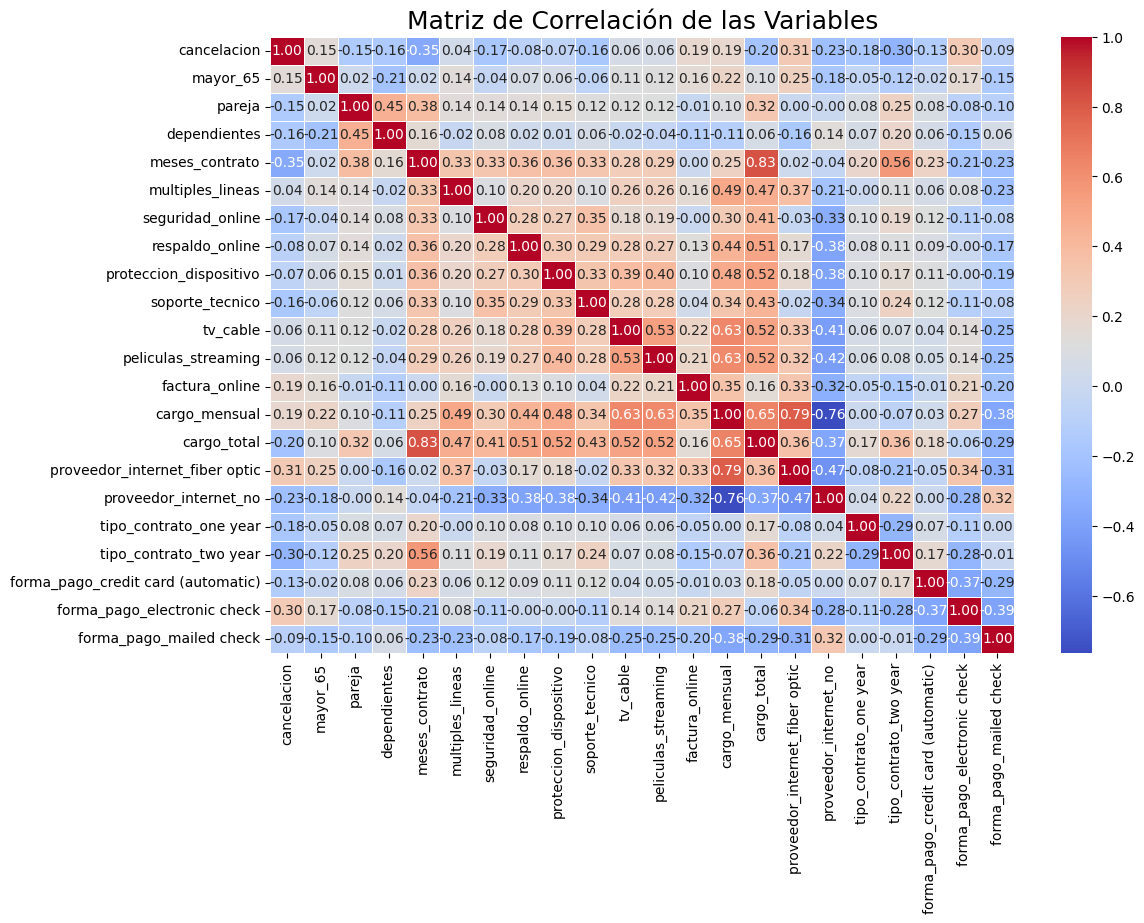

In [ ]:
# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matrix_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de las Variables', fontsize=18)
plt.show()

### **Análisis Dirigido**

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

*    Tiempo de contrato × Cancelación

*    Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-2938761480.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='cancelacion', y='meses_contrato', palette='Set2')


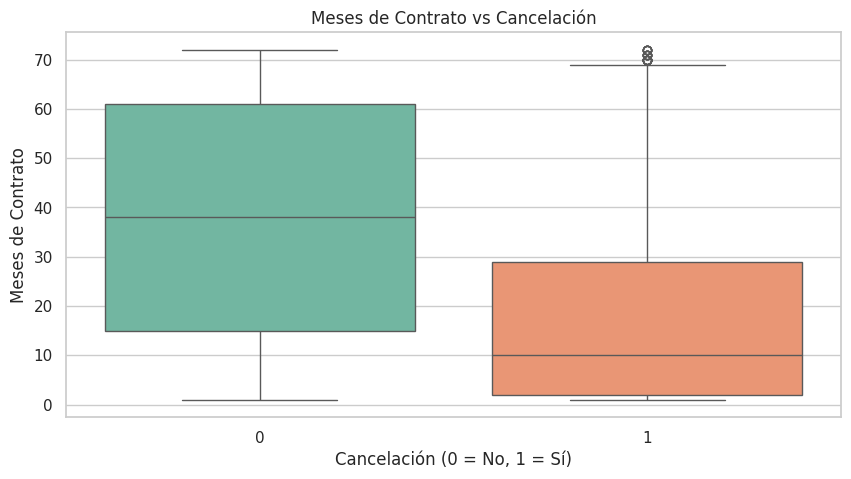

/tmp/ipython-input-2938761480.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='cancelacion', y='cargo_total', palette='Set1')


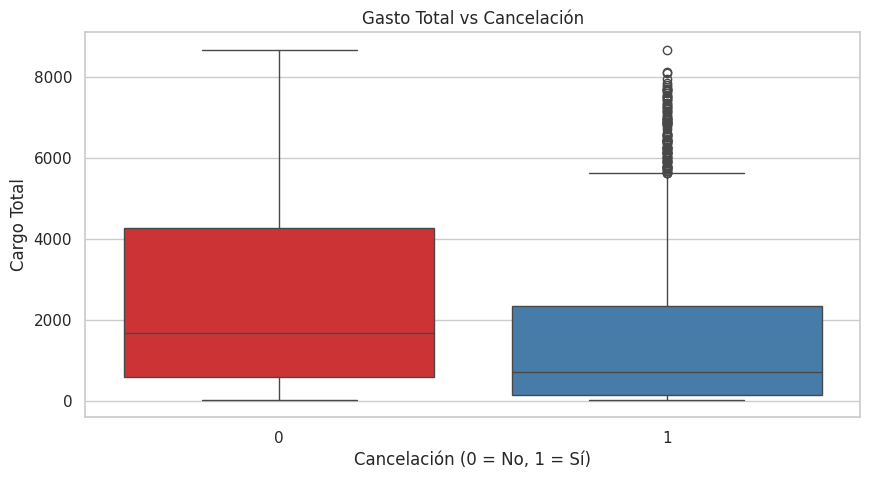

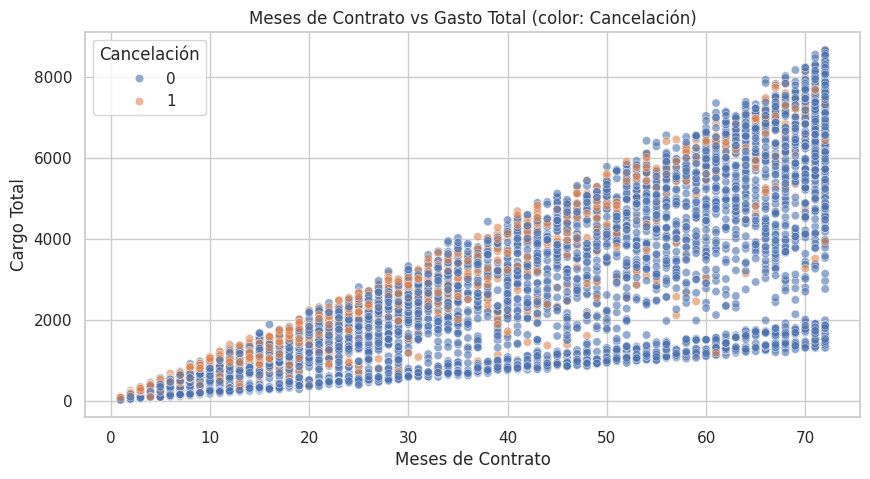

In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


# Boxplot: Meses de contrato vs Cancelación
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_encoded, x='cancelacion', y='meses_contrato', palette='Set2')
plt.title("Meses de Contrato vs Cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Meses de Contrato")
plt.show()

# Boxplot: Gasto Total vs Cancelación
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_encoded, x='cancelacion', y='cargo_total', palette='Set1')
plt.title("Gasto Total vs Cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Cargo Total")
plt.show()

# Scatter Plot opcional para ver dispersión
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_encoded, x='meses_contrato', y='cargo_total', hue='cancelacion', alpha=0.6)
plt.title("Meses de Contrato vs Gasto Total (color: Cancelación)")
plt.xlabel("Meses de Contrato")
plt.ylabel("Cargo Total")
plt.legend(title="Cancelación")
plt.show()

#### **Interpretación de los Boxplots:**

**1. Boxplot: Gasto Total vs Cancelación**

*    **Clientes que no cancelan** (cancelacion = 0):

* *        La caja de los clientes que no cancelan muestra un rango de gasto total que oscila entre 0 y aproximadamente 4,500.

* *        La mediana de gasto está cerca de 2,000, lo que indica que muchos clientes que no cancelan gastan menos en promedio.

* *        Hay outliers o valores atípicos muy altos (por encima de 8,000), lo cual sugiere que algunos clientes que no cancelan tienen un gasto muy alto.

*    **Clientes que cancelan** (cancelacion = 1):

* *        Los clientes que cancelan tienen una mediana de gasto total más baja, alrededor de 1,500.

* *        La caja es más estrecha, lo que indica que el rango de gasto es más concentrado.

* *        También hay outliers o valores atípicos, aunque en menor cantidad que en los clientes que no cancelan.

**Conclusión**: Los clientes que cancelan tienden a tener un gasto total más bajo en comparación con los que no cancelan. Los valores atípicos en ambos casos pueden indicar clientes con gastos muy altos, pero los clientes que cancelan en general parecen tener menos gasto.

#### **2. Boxplot: Meses de Contrato vs Cancelación**

*    **Clientes que no cancelan** (cancelacion = 0):

  *        La caja de los clientes que no cancelan muestra un rango de meses de contrato entre 20 y 65 meses.

  *      La mediana está cerca de los 40 meses, lo que sugiere que los clientes que no cancelan suelen tener contratos largos (más de 3 años).

*   **Clientes que cancelan** (cancelacion = 1):

  *      Los clientes que cancelan tienen una mediana de meses de contrato más baja, alrededor de 20 meses.

  *      La caja está más cerca de los 20-25 meses, lo que sugiere que muchos clientes que cancelan han tenido contratos más cortos.

  *      Hay outliers o valores atípicos en el rango superior (clientes con menos meses que parecen haber cancelado).

**Conclusión:** Los clientes que cancelan tienden a tener contratos más cortos, mientras que los que no cancelan suelen tener contratos más largos.

#### **3. Análisis del Scatter Plot: Meses de Contrato vs Gasto Total (color: Cancelación)**

1.  **Clientes que no cancelan (color azul):**

    *    Los puntos azules se distribuyen en toda la gama de meses de contrato.

    *    Hay una tendencia general de que a medida que los meses de contrato aumentan, el gasto total también tiende a aumentar. Los clientes con contratos más largos (más de 30-40 meses) tienden a gastar más.

    *    La mayoría de los clientes que no cancelan están en los rangos altos de meses de contrato y también tienen un gasto total mayor.

2.    **Clientes que cancelan (color naranja):**

    *    Los puntos naranjas están más concentrados en los meses más bajos de contrato (alrededor de 10-30 meses).

    *    Estos clientes tienden a tener un gasto total más bajo, y muchos de ellos parecen estar en la parte inferior izquierda del gráfico, lo que indica que tienden a cancelar más pronto y a gastar menos.

    *    Sin embargo, hay algunos clientes que cancelan con un alto gasto total, pero su número es mucho menor que los de clientes que no cancelan.

**Tendencias y posibles conclusiones:**

*    Clientes con contratos más largos tienden a gastar más y son menos propensos a cancelar. La relación directa entre meses de contrato y gasto total sugiere que los clientes comprometidos (con contratos largos) suelen tener un gasto más alto y una menor probabilidad de cancelar.

*    Clientes con contratos más cortos (menos de 30 meses) tienden a cancelar más, especialmente aquellos con gastos más bajos. Esto puede indicar que los clientes menos comprometidos y con menor inversión en el servicio tienen más probabilidades de abandonar.

### **Separación de Datos**

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Definir las características (X) y la variable objetivo (y)
X = df_encoded.drop(columns=['cancelacion'])  # Eliminamos 'cancelacion' de las características
y = df_encoded['cancelacion']  # Variable objetivo

In [ ]:
# Dividir el dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Conjunto de Entrenamiento: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Conjunto de Prueba: X_test = {X_test.shape}, y_test = {y_test.shape}")

Conjunto de Entrenamiento: X_train = (5625, 21), y_train = (5625,)
Conjunto de Prueba: X_test = (1407, 21), y_test = (1407,)


### **Creación de Modelos**

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

*    Un modelo puede requerir normalización, como Regresión Logística o KNN.

*    El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

*    **Regresión Logística / KNN:** Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

*    **Árbol de Decisión / Random Forest:** Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

#### **Regresión Logística:**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Inicializar el modelo de regresión logística
logreg = LogisticRegression(random_state=42)

# Entrenar el modelo con los datos de entrenamiento normalizados
logreg.fit(X_train_scaled, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred_logreg = logreg.predict(X_test_scaled)

In [ ]:
# Evaluar el modelo
print("Regresión Logística - Resultados:")
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

Regresión Logística - Resultados:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407

[[916 117]
 [173 201]]


* **Normalización:** Usamos los datos `X_train_scaled` y `X_test_scaled`, que están normalizados mediante StandardScaler.

* **Evaluación:** Usamos `classification_report` y `confusion_matrix` para medir el rendimiento del modelo, con métricas como precisión, recall, f1-score y accuracy.

#### **Random Forest:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Inicializar el modelo de Random Forest
rf = RandomForestClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento sin normalizar
rf.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred_rf = rf.predict(X_test)

In [ ]:
# Evaluar el modelo
print("Random Forest - Resultados:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest - Resultados:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.47      0.54       374

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407

[[929 104]
 [199 175]]


* **Sin Normalización:** Usamos X_train y X_test directamente, sin normalizar, ya que Random Forest no depende de la escala de las características.

* **Evaluación:** Similar al modelo de Regresión Logística, usamos classification_report y confusion_matrix para ver cómo se desempeñó el modelo.

#### **Justificación de la normalización para el Modelo de Regresión Logística:**

La **Regresión Logística** ajusta los coeficientes de cada variable para maximizar la probabilidad de la clasificación. Si las características tienen diferentes escalas, las que tengan valores más grandes (como cargo_total) pueden dominar el proceso de optimización. Normalizar asegura que todas las variables tengan un impacto igual en el modelo, evitando que los coeficientes sean sesgados por las diferencias de magnitud.

### **Evaluación de los Modelos**

Evalúa cada modelo utilizando las siguientes métricas:

*    **Exactitud (Acurácia)**

*    **Precisión**

*    **Recall**

*    **F1-score**

*    **Matriz de confusión**

Después, realiza un análisis crítico y compara los modelos:

  * ¿Cuál modelo tuvo el mejor desempeño?

  *  ¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

       **Overfitting:** Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

       **Underfitting:** Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

#### **Comparación de los resultados**

| **Métrica**             | **Regresión Logística**    | **Random Forest**    |
| ----------------------- | -------------------------- | -------------------- |
| **Exactitud**           | 80%                        | 78%                  |
| **Precisión (Clase 1)** | 0.64                       | 0.62                 |
| **Recall (Clase 1)**    | 0.54                       | 0.48                 |
| **F1-score (Clase 1)**  | 0.58                       | 0.54                 |
| **Matriz de Confusión** | Mejor desempeño en clase 1 | Más falsos negativos |


#### **1.Regresión Logística - Resultados:**

**Métricas:**

   * **Exactitud (Acurácia):** 80%

        El modelo tiene una exactitud del 80%, lo que significa que el 80% de las predicciones son correctas.

   * **Precisión:**

        Clase 0 (No Cancelación): 0.84 (bastante buena)

        Clase 1 (Cancelación): 0.64

        **Interpretación:** La precisión de la clase 1 (cancelación) es algo baja, lo que indica que hay algunos falsos positivos (clientes que no cancelan, pero el modelo predice que sí lo hacen).

    **Recall:**

        Clase 0 (No Cancelación): 0.89

        Clase 1 (Cancelación): 0.54

        **Interpretación:** El recall de la clase 1 es más bajo (0.54), lo que sugiere que el modelo tiene dificultades para identificar clientes que realmente cancelan. Está perdiendo muchos casos de cancelación.

    **F1-score:**

        Clase 0 (No Cancelación): 0.86

        Clase 1 (Cancelación): 0.58

        Interpretación: El F1-score de la clase 1 es más bajo (0.58), lo que refleja una combinación de baja precisión y bajo recall. El modelo no es tan efectivo para predecir cancelaciones.

    **Matriz de Confusión:**

[[918  115]
 [172  202]]

*    918: Verdaderos Negativos (Clientes que no cancelaron y fueron correctamente predichos).

*    115: Falsos Positivos (Clientes que no cancelaron, pero fueron predichos como que sí lo hicieron).

*    172: Falsos Negativos (Clientes que cancelaron, pero fueron predichos como que no lo hicieron).

*    202: Verdaderos Positivos (Clientes que cancelaron y fueron correctamente predichos).

#### **2. Random Forest - Resultados:**

**Métricas:**

   * **Exactitud (Acurácia):** 78%

        El modelo tiene una exactitud del 78%, un poco más baja que la de Regresión Logística (80%).

   * **Precisión:**

        Clase 0 (No Cancelación): 0.83

        Clase 1 (Cancelación): 0.62

        **Interpretación:** Similar a Regresión Logística, la precisión de la clase 1 es baja. Random Forest también tiene problemas para predecir clientes que cancelan correctamente.

   * **Recall:**

        Clase 0 (No Cancelación): 0.89

        Clase 1 (Cancelación): 0.48

        **Interpretación:** El recall de la clase 1 es aún más bajo en Random Forest (0.48), lo que indica que el modelo está perdiendo aún más casos de cancelación en comparación con Regresión Logística.

   * **F1-score:**

        Clase 0 (No Cancelación): 0.86

        Clase 1 (Cancelación): 0.54

        **Interpretación:** El F1-score de la clase 1 también es bajo, lo que refleja que el modelo tiene dificultades tanto en precisión como en recall para los clientes que cancelan.

   * **Matriz de Confusión:**

[[923  110]
 [195  179]]

*   923: Verdaderos Negativos (Clientes que no cancelaron y fueron correctamente predichos).

*    110: Falsos Positivos (Clientes que no cancelaron, pero fueron predichos como que sí lo hicieron).

*    195: Falsos Negativos (Clientes que cancelaron, pero fueron predichos como que no lo hicieron).

*    179: Verdaderos Positivos (Clientes que cancelaron y fueron correctamente predichos).

#### **Análisis Crítico:**

**¿Cuál modelo tuvo el mejor desempeño?**

*    Regresión Logística tuvo un desempeño ligeramente mejor en términos de exactitud (80% vs 78%) y recall (0.54 vs 0.48) para la clase de cancelación. Aunque ambos modelos tienen problemas con la predicción de cancelaciones, Regresión Logística parece tener una ligera ventaja en este caso.

**¿Algún modelo presentó overfitting o underfitting?**

*    **Overfitting:** En este caso, no parece que haya overfitting (el modelo no está sobreajustado a los datos de entrenamiento). Ambos modelos tienen dificultades para generalizar y predecir correctamente las cancelaciones. Sin embargo, Random Forest podría estar ligeramente más complejo debido a la cantidad de árboles y el hecho de que hay más falsos negativos.

*    **Underfitting**: Es posible que ambos modelos estén subajustados (no están capturando adecuadamente las complejidades de los datos), ya que los recalls de la clase 1 son bajos. Debemos ajustar más parámetros, como la profundidad del árbol en Random Forest o los hiperparámetros de la Regresión Logística.

#### **Conclusión:**

 *   Ambos modelos **tienen un rendimiento similar**, pero Regresión Logística tiene una ligera ventaja en cuanto a precisión y recall en la clase de cancelación.

 *  **Los dos modelos parecen estar subajustados**, lo que significa que no están aprovechando todo el potencial de los datos. **Para mejorar, hay que hacer ajustes de hiperparámetros o incluso probar otros modelos.**

### **Ajustes de Random Forest:**



* Aumentar el número de estimadores (árboles).

* Ajustar la profundidad máxima de los árboles.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Definir el modelo de Random Forest
rf = RandomForestClassifier(random_state=42)

# Definir el rango de parámetros a buscar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [10, 20, None],       # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],   # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]      # Número mínimo de muestras por hoja
}

# Utilizar GridSearchCV para encontrar los mejores parámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [ ]:
# Ver los mejores parámetros encontrados
print("Mejores parámetros encontrados:", grid_search.best_params_)


Mejores parámetros encontrados: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


In [ ]:
# Entrenar el modelo con los mejores parámetros
best_rf = grid_search.best_estimator_

# Realizar predicciones sobre el conjunto de prueba
y_pred_rf = best_rf.predict(X_test)

In [ ]:
# Evaluar el modelo
from sklearn.metrics import classification_report, confusion_matrix
print("Random Forest - Ajustado:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest - Ajustado:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

[[916 117]
 [185 189]]


### **Ajustes de Regresión Logística**:

En el caso de la Regresión Logística, podemos probar dos tipos de regularización:

*    L1 (Lasso) y L2 (Ridge). L1 es útil para la selección de características, mientras que L2 es más común y puede mejorar la capacidad de generalización del modelo.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
# Definir el modelo de Regresión Logística
logreg = LogisticRegression(solver='liblinear', random_state=42)

# Definir el rango de parámetros a buscar
param_grid_logreg = {
    'penalty': ['l1', 'l2'],  # Tipo de regularización
    'C': [0.1, 1, 10, 100],   # Inverso de la regularización
    'solver': ['liblinear']   # Solver para el optimizador
}


In [ ]:
# Utilizar GridSearchCV para encontrar los mejores parámetros
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_logreg.fit(X_train_scaled, y_train)

# Ver los mejores parámetros encontrados
print("Mejores parámetros de Regresión Logística:", grid_search_logreg.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Mejores parámetros de Regresión Logística: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Entrenar el modelo con los mejores parámetros
best_logreg = grid_search_logreg.best_estimator_

# Realizar predicciones sobre el conjunto de prueba
y_pred_logreg = best_logreg.predict(X_test_scaled)

# Evaluar el modelo
print("Regresión Logística - Ajustada:")
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

Regresión Logística - Ajustada:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407

[[916 117]
 [172 202]]


**Conclusión:**

*    Regresión Logística tiene un rendimiento ligeramente mejor que Random Forest en exactitud, precisión y F1-score para la clase 1 (cancelación). Sin embargo, ambos modelos presentan un recall bajo para la clase de cancelación, lo que indica que no están identificando bien a los clientes que cancelan.

*    Ajustes necesarios: Probablemente ambos modelos están subajustados. Las recomendaciones serían ajustar más los parámetros, probar modelos más complejos o incluso revisar si hay alguna columna extra a eliminar.

In [ ]:
df_encoded.columns

Index(['cancelacion', 'mayor_65', 'pareja', 'dependientes', 'meses_contrato',
       'multiples_lineas', 'seguridad_online', 'respaldo_online',
       'proteccion_dispositivo', 'soporte_tecnico', 'tv_cable',
       'peliculas_streaming', 'factura_online', 'cargo_mensual', 'cargo_total',
       'proveedor_internet_fiber optic', 'proveedor_internet_no',
       'tipo_contrato_one year', 'tipo_contrato_two year',
       'forma_pago_credit card (automatic)', 'forma_pago_electronic check',
       'forma_pago_mailed check'],
      dtype='object')

#### **Eliminar la columna cargo_total**

Se toma esta decisión debido a que ya estamos usando `cargo_mensual` y `meses_contratados` ya que cargo_total suele ser simplemente el producto de esos dos campos o altamente correlacionado con ellos, lo que introduce redundancia.


Además debido a que estamos eliminando una columna despues del balanceo es necesario volver a hacerlo, porque el conjunto de datos X_train_smote ya no está sincronizado con las nuevas columnas.



#### **Recomendaciones con IA**

Rehacer el pipeline a partir de la división

Haz esto:

*    Divide el conjunto en entrenamiento y prueba.

*    Escala los datos para el modelo basado en distancia (Logística).

*    Aplica SMOTE después del escalado (para el modelo que lo necesita).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

#  Eliminar la columna 'cargo_total'
X = df_encoded.drop(columns=['cancelacion', 'cargo_total'])
y = df_encoded['cancelacion']

#  División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

#  Escalar solo para modelos sensibles a escala (como regresión logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Aplicar SMOTE (solo al conjunto de entrenamiento escalado)
smote = SMOTE(random_state=42)
X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# También para Random Forest: usar los datos SIN ESCALAR
X_train_rf, y_train_rf = smote.fit_resample(X_train, y_train)


#### **Entrenar modelos nuevamente**



#####  **Regresión Logística (con datos escalados + SMOTE):**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, penalty='l2', solver='liblinear')
lr.fit(X_train_scaled_smote, y_train_smote)
y_pred_lr = lr.predict(X_test_scaled)


#####  **Random Forest (con datos sin escalar + SMOTE):**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)
rf.fit(X_train_rf, y_train_rf)
y_pred_rf = rf.predict(X_test)


#### Evaluación de los modelos

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Regresión Logística:\n")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("\nRandom Forest:\n")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Regresión Logística:

[[760 273]
 [ 79 295]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1033
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407


Random Forest:

[[789 244]
 [101 273]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.53      0.73      0.61       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.75      0.77      1407



##### **Métricas globales**

| Modelo                  | Exactitud | Precisión (Clase 1) | Recall (Clase 1) | F1-score (Clase 1) |
| ----------------------- | --------- | ------------------- | ---------------- | ------------------ |
| **Regresión Logística** | 0.75      | 0.52                | **0.79**         | **0.63**           |
| **Random Forest**       | 0.75      | 0.53                | 0.73             | 0.61               |


##### **Interpretación de métricas**

**Regresión Logística**

*    **Ventajas:**

       * Mejor recall para la clase 1 (0.79), lo que significa que detecta más clientes que cancelan.

       * F1-score más alto para la clase 1 (0.63), equilibrando bien precisión y recall.

*    **Desventajas:**

        Precisión baja para clase 1 (0.52), lo que implica más falsos positivos.

**Random Forest**

*   **Ventajas:**

       * Ligera mejora en precisión de clase 1 frente a Logística (0.53 vs 0.52).

       * Buen rendimiento en clase 0.

*    **Desventajas**:

       * Recall de clase 1 más bajo (0.73), por lo que pierde detecciones de cancelaciones.

       * F1-score ligeramente menor (0.61).

##### **Conclusión comparativa**

*  Como el objetivo es identificar el mayor número de cancelaciones posibles → **Regresión Logística es preferible por su recall más alto.**

*  Ambos modelos tienen exactitud idéntica (0.75) y muy similares métricas globales, pero se diferencian en el balance entre precisión y recall para clase 1.

*  En este caso, un recall alto es más crítico porque perder un cliente no detectado es más costoso que una falsa alarma.

##### **Análisis de overfitting / underfitting**

Ninguno de los modelos muestra síntomas fuertes de overfitting: no vemos un rendimiento exageradamente alto en entrenamiento y bajo en prueba.

Sin embargo, ambos parecen ligeramente underfitted: accuracy moderada y recall lejos de 1. Esto sugiere que los modelos no capturan toda la complejidad del patrón de cancelación.

Posibles mejoras:

  *  Probar modelos más complejos como XGBoost o LightGBM.

  *  Ajustar umbral de decisión en Regresión Logística para mejorar recall sin sacrificar demasiado precisión.

  *  Incluir nuevas variables derivadas (feature engineering).

  *  Probar técnicas avanzadas de balanceo como SMOTE

### **Análisis de la Importancia de las Variables**

Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

* Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

* Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.


#### **Regresión Logística – Coeficientes**

In [ ]:
import pandas as pd
import numpy as np

# Coeficientes de la regresión logística
coeficientes = lr.coef_[0]
variables = X_train.columns

# Crear DataFrame ordenado por magnitud absoluta
coef_df = pd.DataFrame({
    'Variable': variables,
    'Coeficiente': coeficientes,
    'Importancia_Absoluta': np.abs(coeficientes)
}).sort_values(by='Importancia_Absoluta', ascending=False)

print(coef_df)

                              Variable  Coeficiente  Importancia_Absoluta
3                       meses_contrato    -0.793566              0.793566
16              tipo_contrato_two year    -0.627919              0.627919
13      proveedor_internet_fiber optic     0.534291              0.534291
14               proveedor_internet_no    -0.436610              0.436610
15              tipo_contrato_one year    -0.303618              0.303618
12                       cargo_mensual    -0.276000              0.276000
9                             tv_cable     0.230726              0.230726
11                      factura_online     0.199118              0.199118
18         forma_pago_electronic check     0.194648              0.194648
8                      soporte_tecnico    -0.182202              0.182202
10                 peliculas_streaming     0.177014              0.177014
4                     multiples_lineas     0.143283              0.143283
5                     seguridad_online

| Variable                             | Coeficiente | Interpretación                                                                    |
| ------------------------------------ | ----------- | --------------------------------------------------------------------------------- |
| **meses\_contrato**                  | -0.79       | Un contrato más largo disminuye la probabilidad de cancelación (negativo).        |
| **tipo\_contrato\_two year**         | -0.63       | Un contrato de dos años disminuye la probabilidad de cancelación.                 |
| **proveedor\_internet\_fiber optic** | 0.53        | Los clientes con proveedor de fibra óptica tienen más probabilidades de cancelar. |
| **proveedor\_internet\_no**          | -0.44       | El hecho de no tener internet también reduce la probabilidad de cancelación.      |
| **tipo\_contrato\_one year**         | -0.30       | Los contratos de un año tienen una relación negativa con la cancelación.          |
| **cargo\_mensual**                   | -0.28       | Los clientes con mayor cargo mensual tienen menos probabilidad de cancelar.       |
| **tv\_cable**                        | 0.23        | Tener TV por cable está relacionado con mayor probabilidad de cancelación.        |
| **factura\_online**                  | 0.20        | Facturación en línea se asocia con un mayor riesgo de cancelación.                |
| **soporte\_tecnico**                 | -0.18       | Tener soporte técnico reduce la probabilidad de cancelación.                      |


##### **Observaciones de Regresión Logística**

* Las variables `meses_contrato` y `tipo_contrato_two year` tienen el mayor impacto negativo, lo que **indica que los contratos más largos tienen menos probabilidades de ser cancelados.**

* Variables como `proveedor_internet_fiber optic` y `tv_cable` `aumentan la probabilidad de cancelación`, lo que podría sugerir que los usuarios con servicios premium (fibra o cable) son más propensos a cancelar.

#### **Random Forest – Importancia de Variables**

In [ ]:
# Importancia de variables en Random Forest
importancias = rf.feature_importances_
rf_df = pd.DataFrame({
    'Variable': variables,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

print(rf_df)

                              Variable  Importancia
3                       meses_contrato     0.174190
16              tipo_contrato_two year     0.137729
12                       cargo_mensual     0.126744
15              tipo_contrato_one year     0.081145
13      proveedor_internet_fiber optic     0.072152
5                     seguridad_online     0.062960
8                      soporte_tecnico     0.055879
2                         dependientes     0.048212
14               proveedor_internet_no     0.045735
1                               pareja     0.038871
17  forma_pago_credit card (automatic)     0.027940
6                      respaldo_online     0.027395
19             forma_pago_mailed check     0.021652
7               proteccion_dispositivo     0.015572
18         forma_pago_electronic check     0.012638
11                      factura_online     0.011460
4                     multiples_lineas     0.011218
10                 peliculas_streaming     0.009857
9           

| Variable                             | Importancia | Interpretación                                                                                                                                       |
| ------------------------------------ | ----------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| **meses\_contrato**                  | 0.17        | Un contrato más largo es relevante para predecir la cancelación (menos cancelaciones).                                                               |
| **tipo\_contrato\_two year**         | 0.14        | Un contrato de dos años tiene un impacto importante en la cancelación (reduce la probabilidad de cancelación).                                       |
| **cargo\_mensual**                   | 0.13        | El cargo mensual es importante, lo que sugiere que los clientes con un cargo más alto podrían ser menos propensos a cancelar.                        |
| **tipo\_contrato\_one year**         | 0.08        | Los contratos de un año tienen una relación moderada con la cancelación.                                                                             |
| **proveedor\_internet\_fiber optic** | 0.07        | Similar a la regresión logística, los clientes con fibra óptica son más propensos a cancelar.                                                        |
| **seguridad\_online**                | 0.06        | La seguridad online tiene una contribución menor, pero sugiere que los clientes que cuentan con este servicio tienen menos probabilidad de cancelar. |
| **soporte\_tecnico**                 | 0.06        | El soporte técnico tiene un pequeño impacto en la predicción de cancelaciones (más cancelaciones sin soporte).                                       |
| **dependientes**                     | 0.05        | Los clientes con dependientes tienen un impacto menor en la predicción de cancelación.                                                               |
| **proveedor\_internet\_no**          | 0.05        | El hecho de no tener proveedor de internet reduce ligeramente la probabilidad de cancelación.                                                        |


##### **Observaciones de Random Forest**

* Las variables `meses_contrato`, `tipo_contrato_two year`, y `cargo_mensual` son las más importantes para el modelo, al igual que en la regresión logística.

* Similar a la regresión logística, `proveedor_internet_fiber optic` es relevante, y `soporte_tecnico` parece ser un factor importante, reduciendo la probabilidad de cancelación.

#### **Visualización**

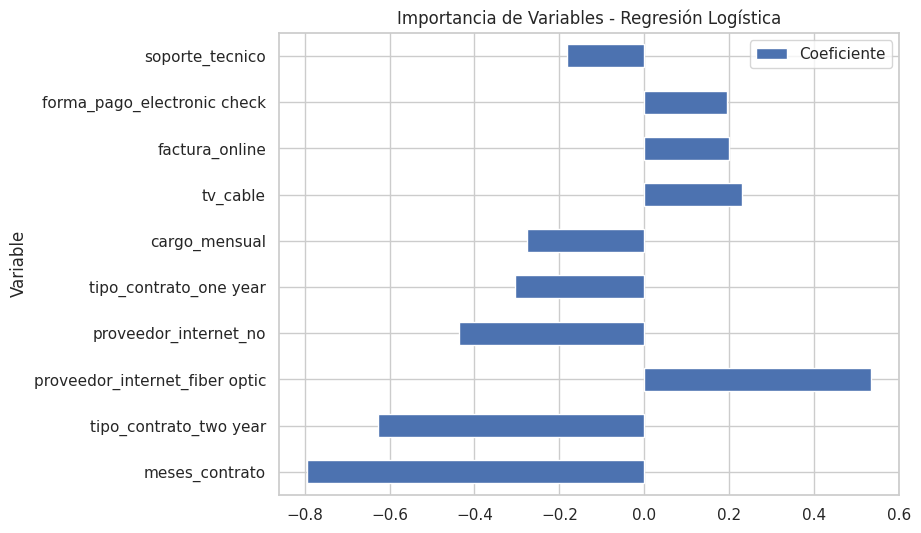

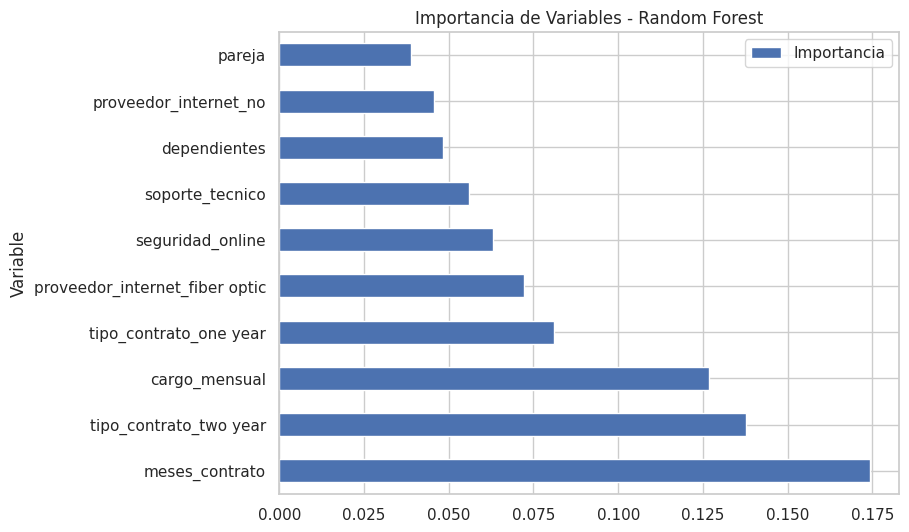

In [ ]:
import matplotlib.pyplot as plt

# Regresión Logística - top 10
fig1, ax1 = plt.subplots(figsize=(8, 6))
coef_df.head(10).plot(
    x='Variable', y='Coeficiente', kind='barh', ax=ax1,
    title='Importancia de Variables - Regresión Logística'
)

# Random Forest - top 10
fig2, ax2 = plt.subplots(figsize=(8, 6))
rf_df.head(10).plot(
    x='Variable', y='Importancia', kind='barh', ax=ax2,
    title='Importancia de Variables - Random Forest'
)

plt.show()

### **Conclusión final**

#### **Informe Final: Análisis de Cancelación de Clientes**

##### **Objetivo del Análisis**

El propósito de este análisis fue **identificar los factores clave que influyen en la cancelación de servicios por parte de los clientes y utilizar estos factores para crear estrategias de retención**. Además, evaluamos el rendimiento de varios modelos predictivos (Regresión Logística y Random Forest) para predecir la probabilidad de cancelación y proporcionar recomendaciones para mejorar la retención de clientes.

##### **Metodología**

**Modelos utilizados:**

   1. **Regresión Logística:** un modelo lineal que nos da coeficientes interpretables, ideales para entender el impacto de cada variable.

   2. **Random Forest**: un modelo basado en árboles que nos proporciona una medida de importancia de las variables, útil para identificar las características más relevantes.

Balanceo de clases: Se utilizó SMOTE para balancear las clases, dado que la clase de cancelación es minoritaria.

Evaluación de modelos: Se analizaron varias métricas de rendimiento, con un enfoque especial en recall para la clase 1 (cancelación), ya que el objetivo es maximizar la detección de cancelaciones.

##### **Resultados del Rendimiento de los Modelos**

| Modelo                  | Exactitud | Precisión (Clase 1) | Recall (Clase 1) | F1-score (Clase 1) |
| ----------------------- | --------- | ------------------- | ---------------- | ------------------ |
| **Regresión Logística** | 0.75      | 0.52                | **0.79**         | **0.63**           |
| **Random Forest**       | 0.75      | **0.53**            | 0.73             | 0.61               |


* Mejor desempeño: Aunque ambos modelos tienen la misma **exactitud de 75%**, **Regresión Logística** tuvo un **mejor recall para la clase 1 (cancelación)** con **0.79**, lo que indica que **detectó más cancelaciones** que Random Forest (0.73).

* Precision vs Recall: A pesar de que **Regresión Logística** tiene una precisión más baja para la clase 1, es **más efectiva en detectar cancelaciones**, lo que la hace más adecuada para este caso.

##### **Análisis de la Importancia de las Variables**

**Variables Clave en la Predicción de Cancelación**

**1.**  **Meses de contrato y tipo de contrato:**

* **Regresión Logística**: `meses_contrato` y `tipo_contrato_two year` son las variables más influyentes con coeficientes negativos, lo que indica que los contratos más largos disminuyen la probabilidad de cancelación.

* **Random Forest**: `meses_contrato` y `tipo_contrato_two year` tienen alta importancia, lo que refuerza la idea de que los contratos a largo plazo son menos propensos a ser cancelados.

**2. Cargo mensual:**

* **Regresión Logística y Random Forest:** Ambas destacan `cargo_mensual` como un factor importante. **Un mayor cargo mensual parece reducir la probabilidad de cancelación**, ya que los clientes que pagan más tienden a mantenerse más tiempo.

**3. Proveedor de Internet:**

* **Regresión Logística**: El proveedor_internet_fiber optic tiene un coeficiente positivo, indicando que los clientes con fibra óptica son más propensos a cancelar. Este patrón se refleja también en Random Forest con una importancia moderada.

**4. Soporte técnico:**

* **Regresión Logística y Random Forest**: La presencia de soporte_tecnico reduce la probabilidad de cancelación. Esto sugiere que los clientes con soporte técnico tienen menos probabilidades de cancelar su servicio.

##### **Factores Más Importantes para la Cancelación**

Basado en el análisis de los modelos, los factores más importantes que afectan la cancelación de clientes son:

1.    **Duración del contrato** (Meses de contrato): Los contratos largos disminuyen la probabilidad de cancelación.

2.    **Tipo de contrato**: Los contratos de dos años son más efectivos para reducir la cancelación.

3.    **Cargo mensual**: Los clientes con mayores cargos mensuales son menos propensos a cancelar, probablemente porque están más comprometidos con el servicio.

4.    **Proveedor de internet** (fibra óptica): Los clientes con fibra óptica tienden a cancelar más, lo que podría indicar que los usuarios de servicios premium buscan más alternativas o tienen mayores expectativas.

5.    **Soporte técnico**: Los clientes con soporte técnico disponible tienen menos probabilidad de cancelar, sugiriendo que mejorar la atención al cliente puede ser clave para la retención.

##### **Propuestas de Estrategias de Retención**

1. **Fidelizar a los clientes con contratos largos:**

   * **Estrategia**: Promover contratos de larga duración (más de 12 meses) para reducir las probabilidades de cancelación. También podrían ofrecerse descuentos o beneficios adicionales para los contratos de dos años.

2. **Aumentar el valor del cargo mensual:**

  * **Estrategia**: Mejorar el valor percibido del servicio, ofreciendo paquetes premium o características adicionales que justifiquen un cargo mensual mayor, con el fin de aumentar la lealtad de los clientes de alto valor.

3. **Mejorar el servicio de soporte técnico:**

  * **Estrategia**: Invertir en mejorar el soporte técnico disponible para los clientes. Implementar soporte 24/7, crear un sistema de tickets más eficiente y promover la ayuda en línea podría reducir las cancelaciones.

4. **Atención a clientes con fibra óptica**:

  * **Estrategia**: Ofrecer paquetes exclusivos para clientes con fibra óptica que puedan mejorar su experiencia, como servicios adicionales, bonificaciones o beneficios personalizados.

5. **Campañas de retención dirigidas a clientes con menos de 12 meses de contrato:**

  * **Estrategia:** Crear campañas de **renovación anticipada** para los clientes que están cerca de finalizar su contrato o que tienen **menos de un año de duración**. Estos clientes pueden ser más susceptibles a cancelar si no reciben incentivos para quedarse.

##### **Conclusión Final**

*    El modelo de **Regresión Logística** ha demostrado ser el más adecuado para la predicción de cancelaciones, ya que tiene un mejor recall para la clase de cancelación (Clase 1). Sin embargo, ambos modelos podrían mejorarse.

*    **Los factores más relevantes para la cancelación** incluyen la duración del contrato, el tipo de contrato, el cargo mensual, el proveedor de internet y la disponibilidad de soporte técnico.

*    Para mejorar la **retención de clientes**, se deben implementar **estrategias centradas en contratos largos, mejora del soporte técnico y valores añadidos para los clientes** con fibra óptica.